<a href="https://colab.research.google.com/github/jacka654321/Cats_vs_Dogs/blob/master/%E2%80%9Ctensorflow_%E5%AE%9E%E6%88%98_%E7%8C%AB%E7%8B%97%E5%A4%A7%E6%88%98_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!ls
!pwd

gdrive	sample_data
/content


In [0]:
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

下载GitHub项目，Jacka654321/Cats_vs_Dogs到VM，速度超快！

Cloning into 'Cats_vs_Dogs'...
remote: Enumerating objects: 37426, done.
remote: Counting objects: 100% (37426/37426), done.
remote: Compressing objects: 100% (37419/37419), done.
remote: Total 37426 (delta 7), reused 37416 (delta 4), pack-reused 0
Receiving objects: 100% (37426/37426), 850.46 MiB | 27.08 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Checking out files: 100% (37514/37514), done.




In [9]:
!git clone https://github.com/jacka654321/Cats_vs_Dogs.git

Cloning into 'Cats_vs_Dogs'...
remote: Enumerating objects: 37426, done.
remote: Counting objects: 100% (37426/37426), done.
remote: Compressing objects: 100% (37419/37419), done.
remote: Total 37426 (delta 7), reused 37416 (delta 4), pack-reused 0
Receiving objects: 100% (37426/37426), 850.46 MiB | 27.08 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Checking out files: 100% (37514/37514), done.


加载google云盘

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


[tensorflow 实战 猫狗大战（一）训练自己的数据](https://blog.csdn.net/hjxu2016/article/details/75305123)

首先编写一个input_data.py这个文件，目的就是返回

input_data.py

There are 12500 cats
There are 12500 dogs
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(tuple(tensor_list)).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.range(limit).shuffle(limit).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.da

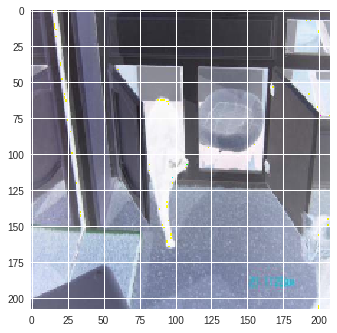

label: 1


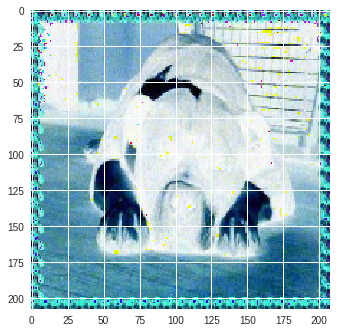

label: 0


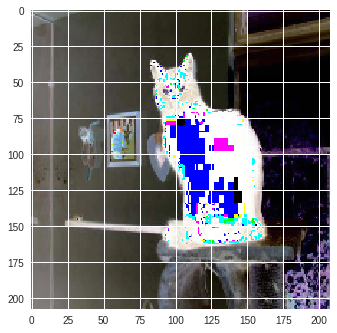

label: 0


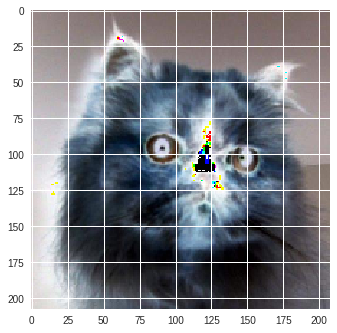

label: 0


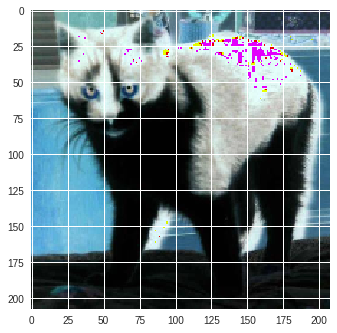

label: 1


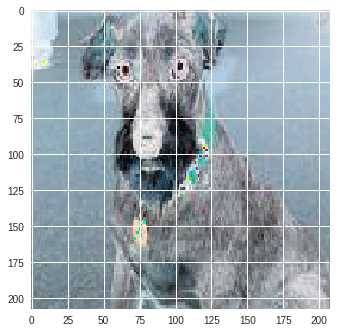

label: 0


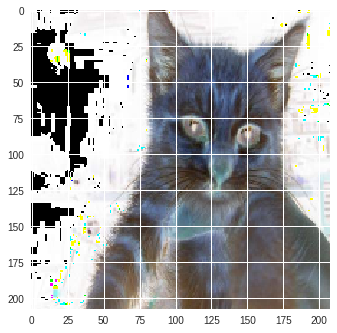

label: 1


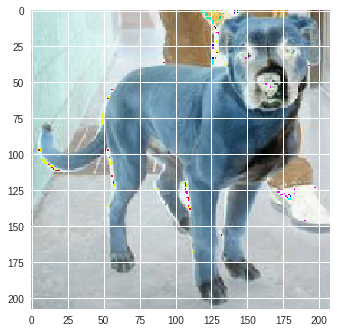

label: 0


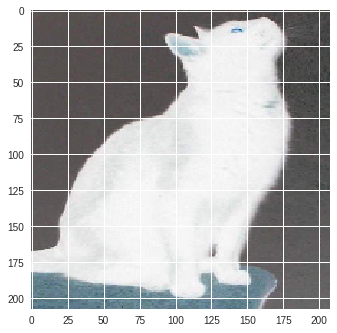

label: 0


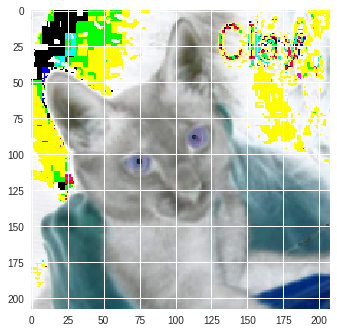

In [2]:
#coding=utf-8
import tensorflow as tf
import numpy as np
import os
 
 
#本地目录：D:\\Cats_vs_Dogs-master\\data\train
#file_dir = 'D:\\Cats_vs_Dogs-master\\data\\train\'
#google云盘
file_dir = 'gdrive/My Drive/Cats_vs_Dogs-master/data/train/'
 
# 获取文件路径和标签
 
def get_files(file_dir):
    # file_dir: 文件夹路径
    # return: 乱序后的图片和标签
 
    cats = []
    label_cats = []
    dogs = []
    label_dogs = []
    # 载入数据路径并写入标签值
    for file in os.listdir(file_dir):
        name = file.split('.')
        if name[0] == 'cat':
            cats.append(file_dir + file)
            label_cats.append(0)
        else:
            dogs.append(file_dir + file)
            label_dogs.append(1)
    print("There are %d cats\nThere are %d dogs" % (len(cats), len(dogs)))
 
    # 打乱文件顺序
    image_list = np.hstack((cats, dogs))
    label_list = np.hstack((label_cats, label_dogs))
    temp = np.array([image_list, label_list])
    temp = temp.transpose()     # 转置
    np.random.shuffle(temp)
 
    image_list = list(temp[:, 0])
    label_list = list(temp[:, 1])
    label_list = [int(i) for i in label_list]
 
    return image_list, label_list
 
# img_list,label_list = get_files(file_dir)
 
# 生成相同大小的批次
def get_batch(image, label, image_W, image_H, batch_size, capacity):
    # image, label: 要生成batch的图像和标签list
    # image_W, image_H: 图片的宽高
    # batch_size: 每个batch有多少张图片
    # capacity: 队列容量
    # return: 图像和标签的batch
 
    # 将python.list类型转换成tf能够识别的格式
    image = tf.cast(image, tf.string)
    label = tf.cast(label, tf.int32)
 
    # 生成队列
    input_queue = tf.train.slice_input_producer([image, label])
 
    image_contents = tf.read_file(input_queue[0])
    label = input_queue[1]
    image = tf.image.decode_jpeg(image_contents, channels=3)
 
    # 统一图片大小
    # 视频方法
    # image = tf.image.resize_image_with_crop_or_pad(image, image_W, image_H)
    # 我的方法
    image = tf.image.resize_images(image, [image_H, image_W], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    image = tf.cast(image, tf.float32)
    # image = tf.image.per_image_standardization(image)   # 标准化数据
    image_batch, label_batch = tf.train.batch([image, label],
                                              batch_size=batch_size,
                                              num_threads=64,   # 线程
                                              capacity=capacity)
 
    # 这行多余？
    # label_batch = tf.reshape(label_batch, [batch_size])
 
    return image_batch, label_batch
 
 
import matplotlib.pyplot as plt

BATCH_SIZE = 2
CAPACITY = 256
IMG_W = 208
IMG_H = 208


image_list, label_list = get_files(file_dir)
image_batch, label_batch = get_batch(image_list, label_list, IMG_W, IMG_H, BATCH_SIZE, CAPACITY)

with tf.Session() as sess:
    i = 0
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    try:
        while not coord.should_stop() and i < 5:
            img, label = sess.run([image_batch, label_batch])

            for j in np.arange(BATCH_SIZE):
                print("label: %d" % label[j])
                plt.imshow(img[j, :, :, :])
                plt.show()
            i += 1
    except tf.errors.OutOfRangeError:
        print("done!")
    finally:
        coord.request_stop()
    coord.join(threads)
    sess.close()


函数get_files(file_dir)的功能是获取给定路径file_dir下的所有的训练数据（包括图片和标签），以list的形式返回。
　　由于训练数据前12500张是猫，后12500张是狗，如果直接按这个顺序训练，训练效果可能会受影响（我自己猜的），所以需要将顺序打乱，至于是读取数据的时候乱序还是训练的时候乱序可以自己选择（视频里说在这里乱序速度比较快）。因为图片和标签是一一对应的，所以要整合到一起乱序。
　　这里先用np.hstack()方法将猫和狗图片和标签整合到一起，得到image_list和label_list，hstack((a,b))的功能是将a和b以水平的方式连接，比如原来cats和dogs是长度为12500的向量，执行了hstack(cats, dogs)后，image_list的长度为25000，同理label_list的长度也为25000。接着将一一对应的image_list和label_list再合并一次。temp的大小是2×25000，经过转置（变成25000×2），然后使用np.random.shuffle()方法进行乱序。
　　最后从temp中分别取出乱序后的image_list和label_list列向量，作为函数的返回值。这里要注意，因为label_list里面的数据类型是字符串类型，所以加上
label_list = [int(i) for i in label_list]
这么一行将其转为int类型。

model.py

In [0]:

#coding=utf-8
import tensorflow as tf
def inference(images, batch_size, n_classes):
 
 
    with tf.variable_scope('conv1') as scope:
        weights = tf.get_variable('weights',
                                  shape=[3, 3, 3, 16],
                                  dtype=tf.float32,
                                  initializer=tf.truncated_normal_initializer(stddev=0.1, dtype=tf.float32))
        biases = tf.get_variable('biases',
                                 shape=[16],
                                 dtype=tf.float32,
                                 initializer=tf.constant_initializer(0.1))
        conv = tf.nn.conv2d(images, weights, strides=[1, 1, 1, 1], padding='SAME')
        pre_activation = tf.nn.bias_add(conv, biases)
        conv1 = tf.nn.relu(pre_activation, name=scope.name)
 
    with tf.variable_scope('pooling1_lrn') as scope:
            pool1 = tf.nn.max_pool(conv1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME', name='pooling1')
            norm1 = tf.nn.lrn(pool1, depth_radius=4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm1')
 
    with tf.variable_scope('conv2') as scope:
                weights = tf.get_variable('weights',
                                          shape=[3, 3, 16, 16],
                                          dtype=tf.float32,
                                          initializer=tf.truncated_normal_initializer(stddev=0.1, dtype=tf.float32))
                biases = tf.get_variable('biases',
                                         shape=[16],
                                         dtype=tf.float32,
                                         initializer=tf.constant_initializer(0.1))
                conv = tf.nn.conv2d(norm1, weights, strides=[1, 1, 1, 1], padding='SAME')
                pre_activation = tf.nn.bias_add(conv, biases)
                conv2 = tf.nn.relu(pre_activation, name='conv2')
 
    # pool2 and norm2
    with tf.variable_scope('pooling2_lrn') as scope:
        norm2 = tf.nn.lrn(conv2, depth_radius=4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm2')
        pool2 = tf.nn.max_pool(norm2, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME', name='pooling2')
 
    with tf.variable_scope('local3') as scope:
        reshape = tf.reshape(pool2, shape=[batch_size, -1])
        dim = reshape.get_shape()[1].value
        weights = tf.get_variable('weights',
                                  shape=[dim, 128],
                                  dtype=tf.float32,
                                  initializer=tf.truncated_normal_initializer(stddev=0.005, dtype=tf.float32))
        biases = tf.get_variable('biases',
                                 shape=[128],
                                 dtype=tf.float32,
                                 initializer=tf.constant_initializer(0.1))
    local3 = tf.nn.relu(tf.matmul(reshape, weights) + biases, name=scope.name)
 
    # local4
    with tf.variable_scope('local4') as scope:
        weights = tf.get_variable('weights',
                                  shape=[128, 128],
                                  dtype=tf.float32,
                                  initializer=tf.truncated_normal_initializer(stddev=0.005, dtype=tf.float32))
        biases = tf.get_variable('biases',
                                 shape=[128],
                                 dtype=tf.float32,
                                 initializer=tf.constant_initializer(0.1))
        local4 = tf.nn.relu(tf.matmul(local3, weights) + biases, name='local4')
 
    # softmax
    with tf.variable_scope('softmax_linear') as scope:
        weights = tf.get_variable('softmax_linear',
                                  shape=[128, n_classes],
                                  dtype=tf.float32,
                                  initializer=tf.truncated_normal_initializer(stddev=0.005, dtype=tf.float32))
        biases = tf.get_variable('biases',
                                 shape=[n_classes],
                                 dtype=tf.float32,
                                 initializer=tf.constant_initializer(0.1))
        softmax_linear = tf.add(tf.matmul(local4, weights), biases, name='softmax_linear')
 
    return softmax_linear
 
 
 
def losses(logits, labels):
    with tf.variable_scope('loss') as scope:
        cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits \
            (logits=logits, labels=labels, name='xentropy_per_example')
        loss = tf.reduce_mean(cross_entropy, name='loss')
        tf.summary.scalar(scope.name + '/loss', loss)
    return loss
 
def trainning(loss, learning_rate):
    with tf.name_scope('optimizer'):
        optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate)
        global_step = tf.Variable(0, name='global_step', trainable=False)
        train_op = optimizer.minimize(loss, global_step= global_step)
    return train_op
 
def evaluation(logits, labels):
    with tf.variable_scope('accuracy') as scope:
        correct = tf.nn.in_top_k(logits, labels, 1)
        correct = tf.cast(correct, tf.float16)
        accuracy = tf.reduce_mean(correct)
        tf.summary.scalar(scope.name + '/accuracy', accuracy)
    return accuracy


函数get_batch()用于将图片分批次，因为一次性将所有25000张图片载入内存不现实也不必要，所以将图片分成不同批次进行训练。这里传入的image和label参数就是函数get_files()返回的image_list和label_list，是Python中的list类型，所以需要将其转为TensorFlow可以识别的tensor格式。
这里使用队列来获取数据，因为队列操作牵扯到线程，我自己对这块也不懂，，所以只从大体上理解了一下，想要系统学习可以去官方文档看看，这里引用了一张图解释。
　　 ![替代文字](http://wiki.jikexueyuan.com/project/tensorflow-zh/images/IncremeterFifoQueue.gif)


　　我认为大体上可以这么理解：每次训练时，从队列中取一个batch送到网络进行训练，然后又有新的图片从训练库中注入队列，这样循环往复。队列相当于起到了训练库到网络模型间数据管道的作用，训练数据通过队列送入网络。（我也不确定这么理解对不对，欢迎指正）

　　继续看程序，我们使用slice_input_producer()来建立一个队列，将image和label放入一个list中当做参数传给该函数。然后从队列中取得image和label，要注意，用read_file()读取图片之后，要按照图片格式进行解码。本例程中训练数据是jpg格式的，所以使用decode_jpeg()解码器，如果是其他格式，就要用其他解码器，具体可以从官方API中查询。注意decode出来的数据类型是uint8，之后模型卷积层里面conv2d()要求输入数据为float32类型，所以如果删掉标准化步骤之后需要进行类型转换。

　　因为训练库中图片大小是不一样的，所以还需要将图片裁剪成相同大小(img_W和img_H)。视频中是用resize_image_with_crop_or_pad()方法来裁剪图片，这种方法是从图像中心向四周裁剪，如果图片超过规定尺寸，最后只会剩中间区域的一部分，可能一只狗只剩下躯干，头都不见了，用这样的图片训练结果肯定会受到影响。所以这里我稍微改动了一下，使用resize_images()对图像进行缩放，而不是裁剪，采用NEAREST_NEIGHBOR插值方法（其他几种插值方法出来的结果图像是花的，具体原因不知道）。

　　缩放之后视频中还进行了per_image_standardization (标准化)步骤，但加了这步之后，得到的图片是花的，虽然各个通道单独提出来是正常的，三通道一起就不对了，删了标准化这步结果正常，所以这里把标准化步骤注释掉了。

　　然后用tf.train.batch()方法获取batch，还有一种方法是tf.train.shuffle_batch()，因为之前我们已经乱序过了，这里用普通的batch()就好。视频中获取batch后还对label进行了一下reshape()操作，在我看来这步是多余的，从batch()方法中获取的大小已经符合我们的要求了，注释掉也没什么影响，能正常获取图片。

　　最后将得到的image_batch和label_batch返回。image_batch是一个4D的tensor，[batch, width, height, channels]，label_batch是一个1D的tensor，[batch]。

　　可以用下面的代码测试获取图片是否成功，因为之前将图片转为float32了，因此这里imshow()出来的图片色彩会有点奇怪，因为本来imshow()是显示uint8类型的数据（灰度值在uint8类型下是0~255，转为float32后会超出这个范围，所以色彩有点奇怪），不过这不影响后面模型的训练。

training.py


In [6]:
#coding=utf-8
import os
import numpy as np
import tensorflow as tf
import input_data
import model
 
N_CLASSES = 2 #猫和狗
IMG_W = 208  # resize图像，太大的话训练时间久
IMG_H = 208
BATCH_SIZE = 16
CAPACITY = 2000
MAX_STEP = 10000 # 一般大于10K
learning_rate = 0.0001 # 一般小于0.0001


#本地目录：D:\\Cats_vs_Dogs-master\\data\train
#file_dir = 'D:\\Cats_vs_Dogs-master\\data\\train\'
#google云盘
#file_dir = 'gdrive/My Drive/Cats_vs_Dogs-master/data/train/' 
train_dir = 'gdrive/My Drive/Cats_vs_Dogs-master/data/train/'
#gdrive/My Drive/Cats_vs_Dogs-master/logs_1
logs_train_dir = 'gdrive/My Drive/Cats_vs_Dogs-master/logs_2/'
 
train, train_label = input_data.get_files(train_dir)
train_batch,train_label_batch=input_data.get_batch(train,
                                train_label,
                                IMG_W,
                                IMG_H,
                                BATCH_SIZE,
                                CAPACITY)
train_logits = model.inference(train_batch, BATCH_SIZE, N_CLASSES)
train_loss = model.losses(train_logits, train_label_batch)
train_op = model.trainning(train_loss, learning_rate)
train__acc = model.evaluation(train_logits, train_label_batch)
summary_op = tf.summary.merge_all() #这个是log汇总记录
 
#产生一个会话
sess = tf.Session()
#产生一个writer来写log文件
train_writer = tf.summary.FileWriter(logs_train_dir, sess.graph)
 #产生一个saver来存储训练好的模型
saver = tf.train.Saver()
#所有节点初始化
sess.run(tf.global_variables_initializer())
 
#队列监控
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)
 
try:
    #执行MAX_STEP步的训练，一步一个batch
    for step in np.arange(MAX_STEP):
        if coord.should_stop():
                break
        #启动以下操作节点，有个疑问，为什么train_logits在这里没有开启？
        _, tra_loss, tra_acc = sess.run([train_op, train_loss, train__acc])
        #每隔50步打印一次当前的loss以及acc，同时记录log，写入writer
        if step % 50 == 0:
            print('Step %d, train loss = %.2f, train accuracy = %.2f%%' %(step, tra_loss, tra_acc*100.0))
            summary_str = sess.run(summary_op)
            train_writer.add_summary(summary_str, step)
        #每隔2000步，保存一次训练好的模型
        if step % 2000 == 0 or (step + 1) == MAX_STEP:
            checkpoint_path = os.path.join(logs_train_dir, 'model.ckpt')
            saver.save(sess, checkpoint_path, global_step=step)
 
except tf.errors.OutOfRangeError:
    print('Done training -- epoch limit reached')
finally:
    coord.request_stop()


ModuleNotFoundError: ignored

[利用resnet 做kaggle猫狗大战图像识别，秒上98准确率](https://blog.csdn.net/shizhengxin123/article/details/72473245)

In [0]:
import os  # 处理字符串路径
import glob  # 查找文件
from keras.models import Sequential  # 导入Sequential模型
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np
from pandas import Series, DataFrame
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import PReLU
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, Adagrad
from keras.utils import np_utils, generic_utils
from six.moves import range
#加载数据
model = Sequential()
#第一个卷积层，4个卷积核，每个卷积核大小5*5。1表示输入的图片的通道,灰度图为1通道。
#激活函数用relu
#你还可以在model.add(Activation('relu'))后加上dropout的技巧，防止过拟合
model.add(Dropout(0.5))
model.add(Convolution2D(4, 5, 5,input_shape=(224, 224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#第二个卷积层，8个卷积核，每个卷积核大小3*3。4表示输入的特征图个数，等于上一层的卷积核个数
#激活函数用relu
#采用maxpooling，poolsize为(2,2)
model.add(Convolution2D(8, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#第三个卷积层，16个卷积核，每个卷积核大小3*3
#激活函数用relu
#采用maxpooling，poolsize为(2,2)
model.add(Convolution2D(16, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#全连接层，先将前一层输出的二维特征图flatten为一维的。
#全连接有128个神经元节点,初始化方式为normal
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#sigmoid分类，输出是2类别
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'd:/train2',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'd:/validation',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')
model.fit_generator(
        train_generator,
        samples_per_epoch=2000,
        nb_epoch=50,
        validation_data=validation_generator,
        nb_val_samples=800)

from keras.utils import plot_model
plot_model(model, to_file='d:/model.png')


resnet及其他方法融合
从知乎看到的一种方法，在这里介绍给大家，通过已训练好的imagenet权重对我们的数据进行特征提取，然后再用提取的特征做一个简单的全连接。代码如下：

In [0]:
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *

import h5py

def write_gap(MODEL, image_size, lambda_func=None):
    width = image_size[0]
    height = image_size[1]
    input_tensor = Input((height, width, 3))
    x = input_tensor
    if lambda_func:
        x = Lambda(lambda_func)(x)

    base_model = MODEL(input_tensor=x, weights='imagenet', include_top=False)
    model = Model(base_model.input, GlobalAveragePooling2D()(base_model.output))

    gen = ImageDataGenerator()
    train_generator = gen.flow_from_directory("d:/train2", image_size, shuffle=False,
                                              batch_size=16)
    test_generator = gen.flow_from_directory("d:/test2", image_size, shuffle=False,
                                             batch_size=16, class_mode=None)

    train = model.predict_generator(train_generator, train_generator.nb_sample)
    test = model.predict_generator(test_generator, test_generator.nb_sample)
    with h5py.File("d:/mymodel/gap_%s.h5"%MODEL.func_name) as h:
        h.create_dataset("train", data=train)
        h.create_dataset("test", data=test)
        h.create_dataset("label", data=train_generator.classes)

write_gap(ResNet50, (224, 224))
write_gap(InceptionV3, (299, 299), inception_v3.preprocess_input)
write_gap(Xception, (299, 299), xception.preprocess_input)



import h5py
import numpy as np
from sklearn.utils import shuffle
np.random.seed(2017)

X_train = []
X_test = []

for filename in ["gap_ResNet50.h5", "gap_Xception.h5", "gap_InceptionV3.h5"]:
    with h5py.File(filename, 'r') as h:
        X_train.append(np.array(h['train']))
        X_test.append(np.array(h['test']))
        y_train = np.array(h['label'])

X_train = np.concatenate(X_train, axis=1)
X_test = np.concatenate(X_test, axis=1)

X_train, y_train = shuffle(X_train, y_train)





from keras.models import *
from keras.layers import *

np.random.seed(2017)

input_tensor = Input(X_train.shape[1:])
x = Dropout(0.5)(input_tensor)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_tensor, x)

model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])



model.fit(X_train, y_train, batch_size=128, nb_epoch=8, validation_split=0.2)

y_pred = model.predict(X_test, verbose=1)
y_pred = y_pred.clip(min=0.005, max=0.995)

import pandas as pd
from keras.preprocessing.image import *

df = pd.read_csv("sample_submission.csv")

gen = ImageDataGenerator()
test_generator = gen.flow_from_directory("test2", (224, 224), shuffle=False,
                                         batch_size=16, class_mode=None)

for i, fname in enumerate(test_generator.filenames):
    index = int(fname[fname.rfind('/')+1:fname.rfind('.')])
    df.set_value(index-1, 'label', y_pred[i])

df.to_csv('pred.csv', index=None)
df.head(10)
